# EDA on Titanic Dataset
- by kaggle
- [link](https://www.kaggle.com/competitions/titanic/data?select=train.csv)

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams     # for changing the figure size

## Data Extraction

### Loading data

In [2]:
df = pd.read_csv("./data/train.csv")

In [3]:
# checking how big the data is
df.shape

(891, 12)

In [4]:
# checking the data
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Analysing information about each column
- checking the type of each column
- how many columns have what amount of null values
- also reading [overview.md](./overview.md) to gather more info about the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Cleaning

### Dropping `Cabin` column because more than 60% values are missing

In [6]:
df.drop(columns=("Cabin"), inplace=True)

### Imputing misisng age values, based on gender's median age

In [7]:
df.loc[df["Sex"]=="male", "Age"].describe()

count    453.000000
mean      30.726645
std       14.678201
min        0.420000
25%       21.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

In [8]:
df.loc[df["Sex"]=="female", "Age"].describe()

count    261.000000
mean      27.915709
std       14.110146
min        0.750000
25%       18.000000
50%       27.000000
75%       37.000000
max       63.000000
Name: Age, dtype: float64

In [9]:
male_avg_age = df.loc[df["Sex"]=="male", "Age"].median()
female_avg_age = df.loc[df["Sex"]=="female", "Age"].median()
male_avg_age, female_avg_age

(29.0, 27.0)

- Filling missing ages based on gender
- - if male, map age 29
- - else, map age 27 (female median)

In [10]:
is_male = df["Sex"]=="male"
df["Age"].fillna(
    is_male.map({True: male_avg_age, False: female_avg_age}),
    inplace=True)

In [11]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [12]:
# Ok, sum is 0, means no NaN values, imputation successfull !!!
df["Age"].isna().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


### Filling misisng `Embarked` values with their mode values

In [14]:
df["Embarked"].fillna(df["Embarked"].mode(dropna=True)[0], inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


- Now all data is clean, it's time to analyze.

### Setting `PassengerId` as index

In [16]:
df.set_index("PassengerId", inplace=True)

## Data Analysis

In [22]:
# Increasing figure dpi (dots per inch)
rcParams["figure.dpi"] = 100
plt.style.use("ggplot")

Text(1, 39.38383838383838, '342')

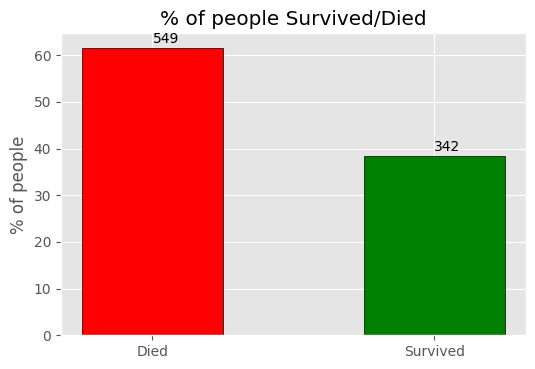

In [47]:
not_survived, survived = df["Survived"].value_counts(normalize=True).sort_index() * 100
plt.title("% of people Survived/Died")
plt.ylabel("% of people")
plt.xticks([0, 1],["Died", "Survived"])
plt.bar([0, 1], [not_survived, survived], 
        width=0.5, color=["red", "green"], edgecolor="black")
plt.text(0, not_survived+1, f"{int(df['Survived'].count() * (not_survived / 100))}")
plt.text(1, survived+1, f"{int(df['Survived'].count() * (survived / 100))}")

### Analyzing how many % of people survived/die of each `Pclass`

In [48]:
survived = df["Survived"]==1
total_cls_1, total_cls_2, total_cls_3 = df["Pclass"].value_counts().sort_index()
# Upper class
survived_cls_1 = round((df[survived]["Pclass"]==1).sum() / total_cls_1 * 100, 0)
not_survived_cls_1 = round((df[~survived]["Pclass"]==1).sum() / total_cls_1 * 100, 0)
# Middle class
survived_cls_2 = round((df.loc[survived]["Pclass"]==2).sum() / total_cls_2 * 100, 0)
not_survived_cls_2 = round((df.loc[~survived]["Pclass"]==2).sum() / total_cls_2 * 100, 0)
# Lower class
survived_cls_3 = round((df.loc[survived]["Pclass"]==3).sum() / total_cls_3 * 100, 0)
not_survived_cls_3 = round((df.loc[~survived]["Pclass"]==3).sum() / total_cls_3 * 100, 0)
(survived_cls_1, not_survived_cls_1),(survived_cls_2, not_survived_cls_2),(survived_cls_3, not_survived_cls_3)

((63.0, 37.0), (47.0, 53.0), (24.0, 76.0))

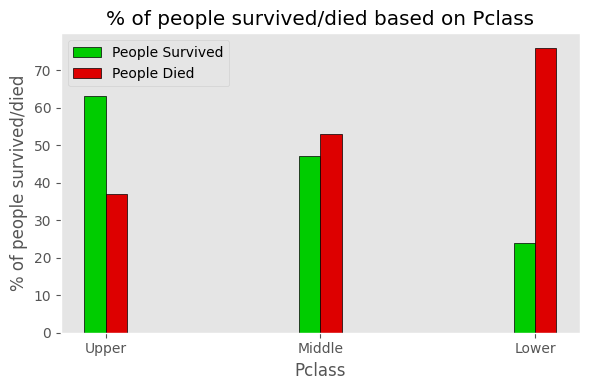

In [49]:
classes = np.arange(1, 4, dtype=int)
cls_names = ["Upper", "Middle", "Lower"]
survived_cls = [survived_cls_1, survived_cls_2, survived_cls_3]
not_survived_cls = [not_survived_cls_1, not_survived_cls_2, not_survived_cls_3]

plt.title("% of people survived/died based on Pclass")
plt.xlabel("Pclass")
plt.xticks(classes, cls_names)
plt.ylabel("% of people survived/died")
plt.bar(classes-0.05, survived_cls, color="#00CC00", label="People Survived", 
        width=-0.1, edgecolor="black")
plt.bar(classes+0.05, not_survived_cls, color="#DD0000", label="People Died", 
        width=0.1, edgecolor="black")
plt.grid(False)
plt.legend()
plt.tight_layout()

### Analyzing % of people die/survived based on gender